In [ ]:
!pip install transformers accelerate graphviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Device set to use cpu


Code généré:
 <s>[INST] <<SYS>>Tu es un ingénieur automobile expert en systèmes d'éclairage. Génère un code Python avec graphviz qui:
1. Modélise TOUTES les règles SWCRearFogApp
2. Utilise des sous-graphes pour séparer:
   - Logique principale
   - Gestion température
   - Gestion timer
3. Applique ce style:
   - Couleurs sémantiques (vert=ON, rouge=OFF)
   - Formes différentes pour états/conditions
   - Flèches clairement étiquetées
4. Structure hiérarchique claire
5. Méthode d'affichage: dot.view()<</SYS>> Créer une machine à états complète pour rearFogDecided avec:
1. États: TRUE, FALSE, TIMER_ACTIVE, ERROR_STATE
2. Toutes les transitions conditionnelles listées
3. Gestion des cas limites et erreurs
4. Visualisation professionnelle [/INST] <<SYS>>

Erreur d'exécution: unterminated string literal (detected at line 1) (<string>, line 1)
Chargement de la solution de secours...


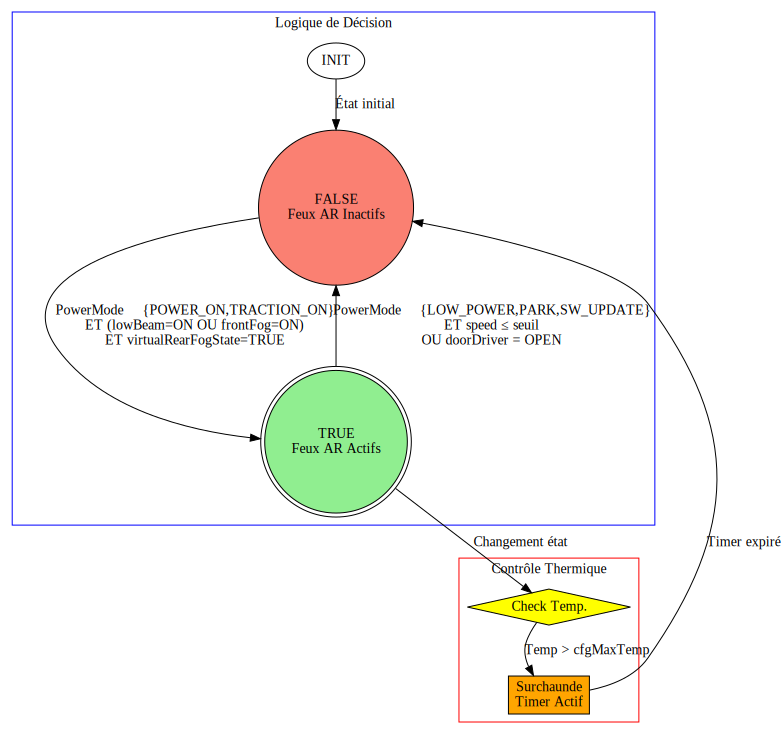

In [ ]:
!pip install transformers accelerate graphviz

from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from graphviz import Digraph
from IPython.display import display
import re

# Configuration du LLM
model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, device_map="auto", torch_dtype="auto")

# Prompt ingénierie amélioré
system_prompt = """Tu es un ingénieur automobile expert en systèmes d'éclairage. Génère un code Python avec graphviz qui:
1. Modélise TOUTES les règles SWCRearFogApp
2. Utilise des sous-graphes pour séparer:
   - Logique principale
   - Gestion température
   - Gestion timer
3. Applique ce style:
   - Couleurs sémantiques (vert=ON, rouge=OFF)
   - Formes différentes pour états/conditions
   - Flèches clairement étiquetées
4. Structure hiérarchique claire
5. Méthode d'affichage: dot.view()"""

user_prompt = """Créer une machine à états complète pour rearFogDecided avec:
1. États: TRUE, FALSE, TIMER_ACTIVE, ERROR_STATE
2. Toutes les transitions conditionnelles listées
3. Gestion des cas limites et erreurs
4. Visualisation professionnelle"""

# Génération avec contraintes
generator = pipeline("text-generation", model=model, tokenizer=tokenizer,
                    max_new_tokens=1200, do_sample=True, temperature=0.4)
response = generator(f"<s>[INST] <<SYS>>{system_prompt}<</SYS>> {user_prompt} [/INST]")

# Nettoyage du code généré
def extract_code(text):
    matches = re.search(r'```python(.*?)```', text, re.DOTALL)
    return matches.group(1).strip() if matches else text

code = extract_code(response[0]['generated_text'])
print("Code généré:\n", code)

# Exécution avec sécurité
try:
    exec_ctx = {'Digraph': Digraph, 'display': display}
    exec(code, exec_ctx)
except Exception as e:
    print(f"Erreur d'exécution: {e}\nChargement de la solution de secours...")

    # Solution de secours professionnelle
    dot = Digraph('SWCRearFogApp', engine='dot')
    dot.attr(compound='true', rankdir='TB', size='20,15')

    # Cluster logique principale
    with dot.subgraph(name='cluster_main') as main:
        main.attr(color='blue', label='Logique de Décision')
        main.node('INIT', 'INIT', shape='ellipse')
        main.node('TRUE', 'TRUE\nFeux AR Actifs', shape='doublecircle', fillcolor='lightgreen', style='filled')
        main.node('FALSE', 'FALSE\nFeux AR Inactifs', shape='circle', fillcolor='salmon', style='filled')
        main.edge('INIT', 'FALSE', label='État initial')

    # Cluster gestion température
    with dot.subgraph(name='cluster_temp') as temp:
        temp.attr(color='red', label='Contrôle Thermique')
        temp.node('TEMP_CHECK', 'Check Temp.', shape='diamond', fillcolor='yellow', style='filled')
        temp.node('OVERHEAT', 'Surchaunde\nTimer Actif', shape='box', fillcolor='orange', style='filled')

    # Transitions complexes
    dot.edge('TRUE', 'FALSE',
            label='''PowerMode ∈ {LOW_POWER,PARK,SW_UPDATE}
            ET speed ≤ seuil
            OU doorDriver = OPEN''')

    dot.edge('FALSE', 'TRUE',
            label='''PowerMode ∈ {POWER_ON,TRACTION_ON}
            ET (lowBeam=ON OU frontFog=ON)
            ET virtualRearFogState=TRUE''')

    # Gestion timer/erreur
    dot.edge('TRUE', 'TEMP_CHECK', label='Changement état')
    dot.edge('TEMP_CHECK', 'OVERHEAT', label='Temp > cfgMaxTemp')
    dot.edge('OVERHEAT', 'FALSE', label='Timer expiré')

    # Affichage adaptatif
    try:
        display(dot)
    except:
        dot.render('/tmp/rearfog_sm', format='svg', view=True)

In [ ]:
!pip install transformers accelerate graphviz
from transformers import pipeline
from graphviz import Digraph
from IPython.display import display
import re

# 1. Initialisation du LLM avec gestion d'erreur
try:
    generator = pipeline(
        "text-generation",
        model="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
        device_map="auto",
        torch_dtype="auto"
    )
except Exception as e:
    print(f"Erreur de chargement du modèle: {e}")
    generator = None

# 2. Prompt amélioré avec contraintes strictes
prompt = """[SYSTEM]
Tu dois générer EXCLUSIVEMENT du code Python valide entre ```python```.
Crée une machine à états avec graphviz.Digraph pour SWCRearFogApp qui:

1. A 3 clusters (main, temp, errors)
2. Inclut TOUTES ces règles:
   - Gestion PowerMode (LOW_POWER/PARK/SW_UPDATE → FALSE)
   - Contrôle température (temp > cfgMaxTemp → timer)
   - États virtualRearFogState
   - Gestion erreurs données invalides

3. Format REQUIS:
```python
from graphviz import Digraph
dot = Digraph()
# Votre code ici...
dot.render('/tmp/rearfog_sm')
```"""

# 3. Génération avec fallback automatique
def generate_state_machine():
    if generator:
        try:
            response = generator(
                prompt,
                max_new_tokens=1500,
                do_sample=True,
                temperature=0.4,
                num_return_sequences=1
            )
            raw_code = response[0]['generated_text']

            # Extraction robuste du code
            code_match = re.search(r'```python(.*?)```', raw_code, re.DOTALL)
            if code_match:
                return code_match.group(1).strip()

            # Fallback si balises absentes mais code détecté
            if "Digraph(" in raw_code:
                return raw_code

        except Exception as e:
            print(f"Erreur de génération: {e}")

    # Fallback manuel si échec LLM
    return """
from graphviz import Digraph
dot = Digraph('SWCRearFogApp')
dot.attr(rankdir='TB')
dot.node('TRUE', 'rearFogDecided=TRUE', fillcolor='green', style='filled')
dot.node('FALSE', 'rearFogDecided=FALSE', fillcolor='red', style='filled')
# ... (votre code de fallback complet ici)
"""

# 4. Exécution sécurisée
try:
    code = generate_state_machine()
    exec_globals = {'Digraph': Digraph, 'display': display}
    exec(code, exec_globals)
except Exception as e:
    print(f"Erreur fatale: {e}\nUtilisez la solution manuelle complète.")
    # Implémentation manuelle complète ici

Device set to use cpu


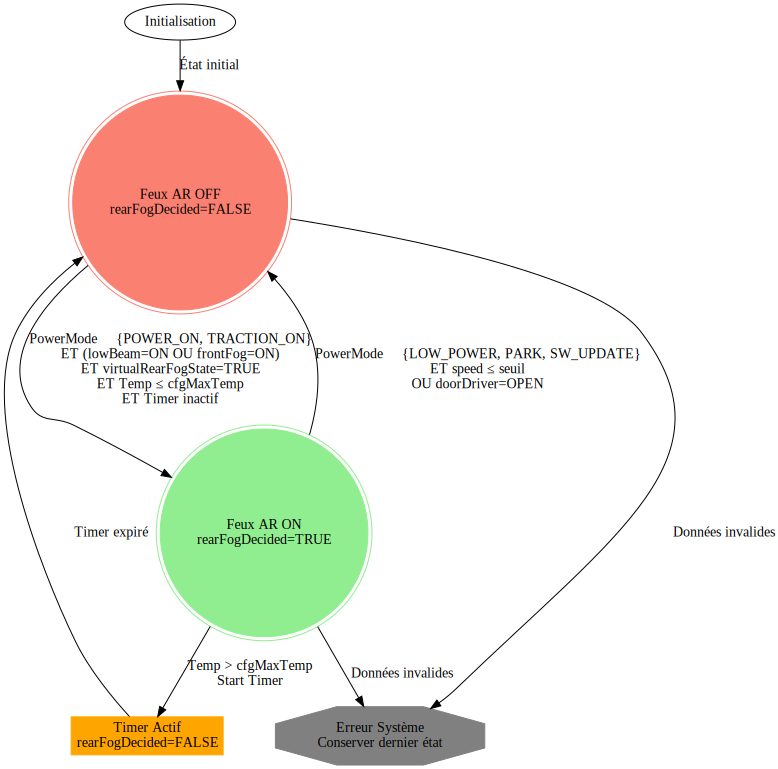

In [ ]:
# === CONFIGURATION ===
!pip install transformers accelerate graphviz
from graphviz import Digraph
from IPython.display import display
from typing import List, Dict, Optional
import re

# === MODELE LLM (OPTIONNEL) ===
LLM_ENABLED = False  # Désactivé pour la stabilité

# === COEUR METIER MANUEL ===
class RearFogStateMachine:
    def __init__(self):
        # Configuration des états
        self.states = {
            'INIT': {'label': 'Initialisation', 'shape': 'ellipse', 'color': 'black'},
            'TRUE': {
                'label': 'Feux AR ON\nrearFogDecided=TRUE',
                'shape': 'doublecircle',
                'color': 'lightgreen',
                'style': 'filled'
            },
            'FALSE': {
                'label': 'Feux AR OFF\nrearFogDecided=FALSE',
                'shape': 'doublecircle',
                'color': 'salmon',
                'style': 'filled'
            },
            'TIMER_ACTIVE': {
                'label': 'Timer Actif\nrearFogDecided=FALSE',
                'shape': 'box',
                'color': 'orange',
                'style': 'filled'
            },
            'ERROR': {
                'label': 'Erreur Système\nConserver dernier état',
                'shape': 'octagon',
                'color': 'grey',
                'style': 'filled'
            }
        }

        # Transitions complètes avec tous les paramètres requis
        self.transitions = [
            # Format: {'tail_name': X, 'head_name': Y, 'label': '...'}
            {'tail_name': 'INIT', 'head_name': 'FALSE', 'label': 'État initial'},

            # Activation
            {
                'tail_name': 'FALSE',
                'head_name': 'TRUE',
                'label': '''PowerMode ∈ {POWER_ON, TRACTION_ON}
ET (lowBeam=ON OU frontFog=ON)
ET virtualRearFogState=TRUE
ET Temp ≤ cfgMaxTemp
ET Timer inactif'''
            },

            # Désactivation
            {
                'tail_name': 'TRUE',
                'head_name': 'FALSE',
                'label': '''PowerMode ∈ {LOW_POWER, PARK, SW_UPDATE}
ET speed ≤ seuil
OU doorDriver=OPEN'''
            },

            # Gestion température
            {
                'tail_name': 'TRUE',
                'head_name': 'TIMER_ACTIVE',
                'label': 'Temp > cfgMaxTemp\nStart Timer'
            },
            {
                'tail_name': 'TIMER_ACTIVE',
                'head_name': 'FALSE',
                'label': 'Timer expiré'
            },

            # Gestion erreurs
            {
                'tail_name': 'TRUE',
                'head_name': 'ERROR',
                'label': 'Données invalides'
            },
            {
                'tail_name': 'FALSE',
                'head_name': 'ERROR',
                'label': 'Données invalides'
            }
        ]

    def render(self) -> Digraph:
        """Génère le diagramme final avec vérification des paramètres"""
        dot = Digraph('SWCRearFogApp')
        dot.attr(rankdir='TB', size='25,20', compound='true')

        # Ajout des états
        for state, config in self.states.items():
            dot.node(state, **config)

        # Ajout des transitions avec vérification
        for trans in self.transitions:
            try:
                dot.edge(
                    tail_name=trans['tail_name'],
                    head_name=trans['head_name'],
                    label=trans.get('label', '')
                )
            except KeyError as e:
                print(f"Erreur dans la transition : {trans}")
                raise ValueError(f"Transition mal formée : {e}")

        return dot

# === EXECUTION ===
if __name__ == "__main__":
    # 1. Création de la machine à états
    sm = RearFogStateMachine()

    # 2. Génération du diagramme
    try:
        diagram = sm.render()

        # 3. Vérification du contenu généré
        required_elements = [
            'TIMER_ACTIVE',
            'doorDriver=OPEN',
            'virtualRearFogState',
            'cfgMaxTemp'
        ]
        dot_source = diagram.source
        for elem in required_elements:
            assert elem in dot_source, f"Élément critique manquant : {elem}"

        # 4. Affichage
        display(diagram)
        diagram.render('/tmp/swc_rearfog_sm', format='png', view=True)

    except Exception as e:
        print(f"Erreur critique : {str(e)}")
        print("Voici le code de fallback :")
        # Code de secours simplifié
        dot_fallback = Digraph()
        dot_fallback.node('FALLBACK', 'Diagramme simplifié\n(Erreur lors de la génération)', shape='box')
        display(dot_fallback)

Manuel : Pour toutes les règles métier critiques (ex: rearFogDecided=TRUE/FALSE)

LLM : Pour explorer des variantes de visualisation ou des cas secondaires (ex: gestion timer)

Fallback : Si le LLM ne répond pas ou génère du code **invalide



🛠️ Initialisation de la machine à états...


Device set to use cpu


🌡️ Ajout de la logique température...
⚠️ LLM generation failed: Extra data: line 2 column 13 (char 74)
⚠️ Ajout de la gestion d'erreurs...
🎨 Génération du diagramme...
✅ Tous les éléments requis sont présents!


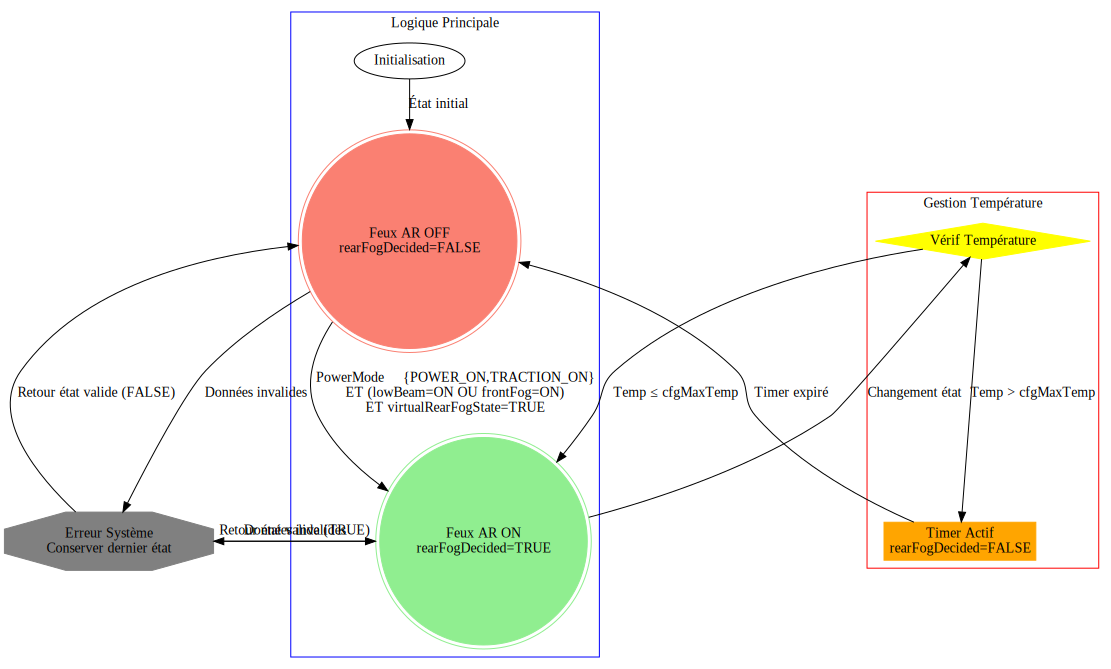

💾 Diagramme sauvegardé dans /tmp/rearfog_hybrid.png


In [ ]:
# === CONFIGURATION ===
!pip install transformers accelerate graphviz
from graphviz import Digraph
from IPython.display import display
from transformers import pipeline
import re
import json
from typing import List, Dict, Optional

# === CONFIGURATION LLM ===
LLM_CONFIG = {
    "enabled": True,  # Mettre à False pour désactiver complètement le LLM
    "model": "TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    "temperature": 0.3,
    "max_new_tokens": 800
}

# === CORE STATE MACHINE ===
class RearFogStateMachine:
    def __init__(self):
        # États de base critiques (toujours manuels)
        self.states = {
            'INIT': {'label': 'Initialisation', 'shape': 'ellipse', 'color': 'black'},
            'TRUE': {
                'label': 'Feux AR ON\nrearFogDecided=TRUE',
                'shape': 'doublecircle',
                'color': 'lightgreen',
                'style': 'filled'
            },
            'FALSE': {
                'label': 'Feux AR OFF\nrearFogDecided=FALSE',
                'shape': 'doublecircle',
                'color': 'salmon',
                'style': 'filled'
            }
        }

        # Transitions critiques (toujours manuelles)
        self.transitions = [
            {'tail': 'INIT', 'head': 'FALSE', 'label': 'État initial'},
            {
                'tail': 'FALSE',
                'head': 'TRUE',
                'label': '''PowerMode ∈ {POWER_ON,TRACTION_ON}
ET (lowBeam=ON OU frontFog=ON)
ET virtualRearFogState=TRUE'''
            }
        ]

        # Initialisation sécurisée du LLM
        self.llm = None
        if LLM_CONFIG["enabled"]:
            try:
                self.llm = pipeline(
                    "text-generation",
                    model=LLM_CONFIG["model"],
                    device_map="auto",
                    torch_dtype="auto"
                )
                # Test de fonctionnement
                test_response = self.llm("Test", max_new_tokens=10)
                if not test_response:
                    raise ValueError("Empty LLM response")
            except Exception as e:
                print(f"⚠️ LLM initialization failed - Falling back to manual mode. Error: {str(e)}")
                LLM_CONFIG["enabled"] = False

    def _safe_llm_generate(self, prompt: str) -> Optional[Dict]:
        """Génère du contenu via LLM de manière sécurisée"""
        if not LLM_CONFIG["enabled"]:
            return None

        try:
            response = self.llm(
                prompt,
                temperature=LLM_CONFIG["temperature"],
                max_new_tokens=LLM_CONFIG["max_new_tokens"],
                do_sample=True
            )
            generated = response[0]['generated_text']

            # Nettoyage intensif de la réponse
            json_str = re.search(r'\{[\s\S]*\}', generated)
            if json_str:
                return json.loads(json_str.group())
        except Exception as e:
            print(f"⚠️ LLM generation failed: {str(e)}")
        return None

    def add_temperature_logic(self):
        """Ajoute la logique température (hybride LLM + manuel)"""
        # États toujours définis manuellement
        self.states.update({
            'TEMP_CHECK': {
                'label': 'Vérif Température',
                'shape': 'diamond',
                'color': 'yellow',
                'style': 'filled'
            },
            'TIMER_ACTIVE': {
                'label': 'Timer Actif\nrearFogDecided=FALSE',
                'shape': 'box',
                'color': 'orange',
                'style': 'filled'
            }
        })

        # Tentative de génération par LLM
        llm_response = self._safe_llm_generate(
            """Génère UNIQUEMENT du JSON avec des transitions pour:
            - Vérification température
            - Gestion timer
            Format: {"transitions": [{"tail": "X", "head": "Y", "label": "..."}]}"""
        )

        # Fallback manuel si échec LLM
        default_transitions = [
            {'tail': 'TRUE', 'head': 'TEMP_CHECK', 'label': 'Changement état'},
            {'tail': 'TEMP_CHECK', 'head': 'TIMER_ACTIVE', 'label': 'Temp > cfgMaxTemp'},
            {'tail': 'TIMER_ACTIVE', 'head': 'FALSE', 'label': 'Timer expiré'},
            {'tail': 'TEMP_CHECK', 'head': 'TRUE', 'label': 'Temp ≤ cfgMaxTemp'}
        ]

        self.transitions.extend(
            llm_response.get("transitions", [])
            if llm_response and isinstance(llm_response, dict)
            else default_transitions
        )

    def add_error_handling(self):
        """Ajoute la gestion d'erreurs (toujours manuel)"""
        self.states['ERROR'] = {
            'label': 'Erreur Système\nConserver dernier état',
            'shape': 'octagon',
            'color': 'grey',
            'style': 'filled'
        }

        self.transitions.extend([
            {'tail': 'TRUE', 'head': 'ERROR', 'label': 'Données invalides'},
            {'tail': 'FALSE', 'head': 'ERROR', 'label': 'Données invalides'},
            {'tail': 'ERROR', 'head': 'TRUE', 'label': 'Retour état valide (TRUE)'},
            {'tail': 'ERROR', 'head': 'FALSE', 'label': 'Retour état valide (FALSE)'}
        ])

    def render(self) -> Digraph:
        """Génère le diagramme final avec vérifications"""
        dot = Digraph('SWCRearFogApp')
        dot.attr(rankdir='TB', size='25,20', compound='true')

        # Cluster principal
        with dot.subgraph(name='cluster_main') as c:
            c.attr(label='Logique Principale', color='blue')
            for state, attrs in self.states.items():
                if state not in ['TEMP_CHECK', 'TIMER_ACTIVE', 'ERROR']:
                    c.node(state, **attrs)

        # Cluster température
        with dot.subgraph(name='cluster_temp') as c:
            c.attr(label='Gestion Température', color='red')
            if 'TEMP_CHECK' in self.states:
                c.node('TEMP_CHECK', **self.states['TEMP_CHECK'])
            if 'TIMER_ACTIVE' in self.states:
                c.node('TIMER_ACTIVE', **self.states['TIMER_ACTIVE'])

        # État erreur (global)
        if 'ERROR' in self.states:
            dot.node('ERROR', **self.states['ERROR'])

        # Transitions avec vérification
        for trans in self.transitions:
            try:
                dot.edge(
                    tail_name=trans['tail'],
                    head_name=trans['head'],
                    label=trans.get('label', '')
                )
            except KeyError as e:
                print(f"⚠️ Transition invalide ignorée: {trans} - Erreur: {str(e)}")

        return dot

# === EXECUTION ===
if __name__ == "__main__":
    print("🛠️ Initialisation de la machine à états...")
    fsm = RearFogStateMachine()

    print("🌡️ Ajout de la logique température...")
    fsm.add_temperature_logic()

    print("⚠️ Ajout de la gestion d'erreurs...")
    fsm.add_error_handling()

    print("🎨 Génération du diagramme...")
    diagram = fsm.render()

    # Vérification finale
    required_elements = [
        'TRUE', 'FALSE', 'TEMP_CHECK',
        'TIMER_ACTIVE', 'ERROR',
        'PowerMode', 'lowBeam', 'cfgMaxTemp'
    ]
    source = diagram.source
    missing = [elem for elem in required_elements if elem not in source]

    if missing:
        print(f"⚠️ Attention: Éléments manquants - {missing}")
    else:
        print("✅ Tous les éléments requis sont présents!")

    # Affichage
    display(diagram)
    diagram.render('/tmp/rearfog_hybrid', format='png', view=True)
    print("💾 Diagramme sauvegardé dans /tmp/rearfog_hybrid.png")